In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_score
import seaborn as sb
from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)

# Read the dataset

In [2]:
df=pd.read_csv("Airbnb.csv")

In [3]:
df

Unnamed: 0                                          stay type  \
0            40                    Entire rental unit in Battersea   
1            41                        Hostel room in LB of Camden   
2            42           Entire serviced apartment in Earls Court   
3            44             Private room in Whitechapel/Brick Lane   
4            47  Entire rental unit in RB of Kensington and Che...   
..          ...                                                ...   
517          95               Entire rental unit in Grachtengordel   
518          96                     Private room in Indische Buurt   
519          97                     Private room in Indische Buurt   
520          98           Room in boutique hotel in Grachtengordel   
521          99                       Private room in Stadionbuurt   

                                                header  rating  \
0                      Battersea Park Studio Apartment    5.00   
1      Large Double Private Basic Room Shared Bathroom    4.42   
2                  Gorgeous Studio Flat in  Kensington    4.86   
3     Large and Bright - 10 mins to the CITY of LONDON    4.90   
4                         Terrific Notting Hill Studio    4.55   
..                                                 ...     ...   
517                 Loft Leidsegracht - Private studio    4.77   
518        Luxurious Cozy Studio | Edge Of City Center    4.67   
519       Elegant Stylish Studio | Close 2 City Center    4.60   
520  Superlocated Canalhouse room private ensuite bath    4.68   
521                 Charming quite room with fast Wifi    4.57   

     number of reviews  price       city  Guests  Bedrooms  Beds  Baths  
0                    6    110     London       2         1     0    1.0  
1                   33     76     London       2         1     1    1.0  
2                   57     83     London       2         1     1    1.0  
3                   10     25     London       2         1     1    1.0  
4                  218     67     London       1         1     1    1.0  
..                 ...    ...        ...     ...       ...   ...    ...  
517                145    195  Amsterdam       2         1     1    1.0  
518                 90     62  Amsterdam       2         1     1    1.0  
519                 95     82  Amsterdam       2         1     1    1.0  
520                185     95  Amsterdam       1         1     1    1.5  
521                399     51  Amsterdam       2         1     1    1.0  

[522 rows x 11 columns]

# Remove Unnamed: 0 column

In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df

stay type  \
0                      Entire rental unit in Battersea   
1                          Hostel room in LB of Camden   
2             Entire serviced apartment in Earls Court   
3               Private room in Whitechapel/Brick Lane   
4    Entire rental unit in RB of Kensington and Che...   
..                                                 ...   
517               Entire rental unit in Grachtengordel   
518                     Private room in Indische Buurt   
519                     Private room in Indische Buurt   
520           Room in boutique hotel in Grachtengordel   
521                       Private room in Stadionbuurt   

                                                header  rating  \
0                      Battersea Park Studio Apartment    5.00   
1      Large Double Private Basic Room Shared Bathroom    4.42   
2                  Gorgeous Studio Flat in  Kensington    4.86   
3     Large and Bright - 10 mins to the CITY of LONDON    4.90   
4                         Terrific Notting Hill Studio    4.55   
..                                                 ...     ...   
517                 Loft Leidsegracht - Private studio    4.77   
518        Luxurious Cozy Studio | Edge Of City Center    4.67   
519       Elegant Stylish Studio | Close 2 City Center    4.60   
520  Superlocated Canalhouse room private ensuite bath    4.68   
521                 Charming quite room with fast Wifi    4.57   

     number of reviews  price       city  Guests  Bedrooms  Beds  Baths  
0                    6    110     London       2         1     0    1.0  
1                   33     76     London       2         1     1    1.0  
2                   57     83     London       2         1     1    1.0  
3                   10     25     London       2         1     1    1.0  
4                  218     67     London       1         1     1    1.0  
..                 ...    ...        ...     ...       ...   ...    ...  
517                145    195  Amsterdam       2         1     1    1.0  
518                 90     62  Amsterdam       2         1     1    1.0  
519                 95     82  Amsterdam       2         1     1    1.0  
520                185     95  Amsterdam       1         1     1    1.5  
521                399     51  Amsterdam       2         1     1    1.0  

[522 rows x 10 columns]

In [5]:
sns.pairplot(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   stay type          522 non-null    object 
 1   header             522 non-null    object 
 2   rating             522 non-null    float64
 3   number of reviews  522 non-null    int64  
 4   price              522 non-null    int64  
 5   city               522 non-null    object 
 6   Guests             522 non-null    int64  
 7   Bedrooms           522 non-null    int64  
 8   Beds               522 non-null    int64  
 9   Baths              522 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 40.9+ KB


# Feature Selection

In [7]:
df.corr()

rating  number of reviews     price    Guests  Bedrooms  \
rating             1.000000           0.045862  0.006079 -0.041111 -0.032946   
number of reviews  0.045862           1.000000 -0.023674  0.030098 -0.014871   
price              0.006079          -0.023674  1.000000  0.366530  0.342327   
Guests            -0.041111           0.030098  0.366530  1.000000  0.491315   
Bedrooms          -0.032946          -0.014871  0.342327  0.491315  1.000000   
Beds               0.017086          -0.007153  0.210705  0.626224  0.383035   
Baths              0.034177          -0.020419 -0.041189 -0.013145  0.129918   

                       Beds     Baths  
rating             0.017086  0.034177  
number of reviews -0.007153 -0.020419  
price              0.210705 -0.041189  
Guests             0.626224 -0.013145  
Bedrooms           0.383035  0.129918  
Beds               1.000000 -0.044511  
Baths             -0.044511  1.000000

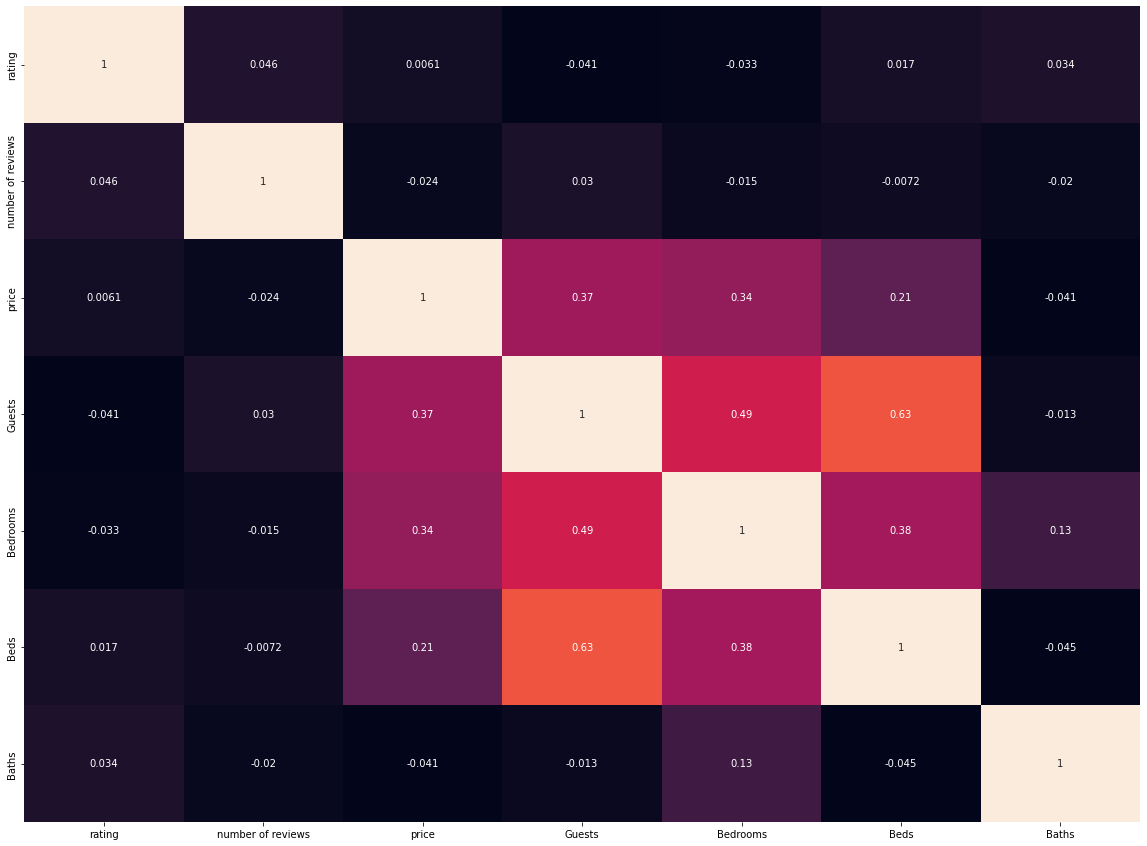

In [8]:
plt.subplots(figsize=(20,15))
dataplot = sb.heatmap(df.corr(),cbar=False, annot=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   stay type          522 non-null    object 
 1   header             522 non-null    object 
 2   rating             522 non-null    float64
 3   number of reviews  522 non-null    int64  
 4   price              522 non-null    int64  
 5   city               522 non-null    object 
 6   Guests             522 non-null    int64  
 7   Bedrooms           522 non-null    int64  
 8   Beds               522 non-null    int64  
 9   Baths              522 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 40.9+ KB


In [10]:
Airbnb=df[['rating', 'number of reviews', 'price', 'Guests', 'Bedrooms', 'Beds', 'Baths','city']]
Airbnb

rating  number of reviews  price  Guests  Bedrooms  Beds  Baths  \
0      5.00                  6    110       2         1     0    1.0   
1      4.42                 33     76       2         1     1    1.0   
2      4.86                 57     83       2         1     1    1.0   
3      4.90                 10     25       2         1     1    1.0   
4      4.55                218     67       1         1     1    1.0   
..      ...                ...    ...     ...       ...   ...    ...   
517    4.77                145    195       2         1     1    1.0   
518    4.67                 90     62       2         1     1    1.0   
519    4.60                 95     82       2         1     1    1.0   
520    4.68                185     95       1         1     1    1.5   
521    4.57                399     51       2         1     1    1.0   

          city  
0       London  
1       London  
2       London  
3       London  
4       London  
..         ...  
517  Amsterdam  
518  Amsterdam  
519  Amsterdam  
520  Amsterdam  
521  Amsterdam  

[522 rows x 8 columns]

# Feature Engineering


In [11]:
new_Airbnb = pd.get_dummies(Airbnb)
new_Airbnb.columns

Index(['rating', 'number of reviews', 'price', 'Guests', 'Bedrooms', 'Beds',
       'Baths', 'city_Amsterdam', 'city_Berlin', 'city_London', 'city_Madrid',
       'city_Milano'],
      dtype='object')

<AxesSubplot:>

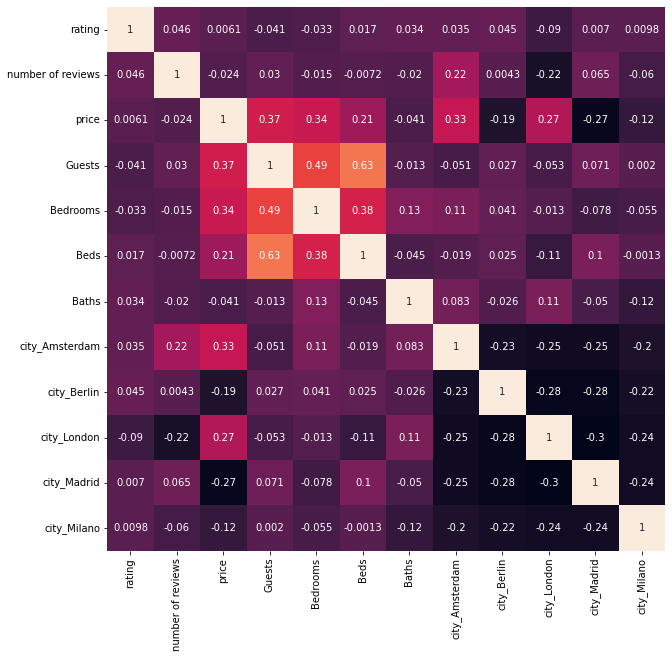

In [12]:
plt.subplots(figsize=(10,10))
sns.heatmap(new_Airbnb.corr(),cbar=False, annot=True)

In [13]:
#Handling zeros values 
new_Airbnb.loc[new_Airbnb['price'] == 0]

Empty DataFrame
Columns: [rating, number of reviews, price, Guests, Bedrooms, Beds, Baths, city_Amsterdam, city_Berlin, city_London, city_Madrid, city_Milano]
Index: []

In [14]:
new_Airbnb['price']=new_Airbnb['price'].replace(0,new_Airbnb['price'].median())

In [15]:
new_Airbnb.loc[new_Airbnb['price'] == 0]

Empty DataFrame
Columns: [rating, number of reviews, price, Guests, Bedrooms, Beds, Baths, city_Amsterdam, city_Berlin, city_London, city_Madrid, city_Milano]
Index: []

# Splitting the data

In [16]:
X = new_Airbnb.drop(['price','number of reviews'], axis = 1)
y = new_Airbnb['price']

X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [17]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
#print(y_pred)
print(r2_score(y_test, y_pred))

0.4835631210546264


In [18]:
val_score = lr.score(X_val, y_val)  
val_score

0.4276241545134303

In [19]:
train_score = lr.score(X_train, y_train)
train_score

0.3955487978357055

In [20]:
test_score = lr.score(X_test, y_test)
test_score

0.4835631210546264

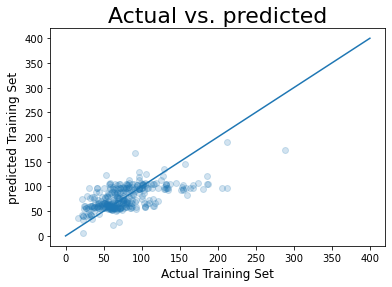

In [21]:
# Actual Training Set(x) vs. predicted Training Set(y)
y_train_pred = lr.predict(X_train)

plt.scatter(y_train, y_train_pred, alpha=0.2)#cross valid do train only 
plt.title("Actual vs. predicted", size=22)
plt.xlabel('Actual Training Set', size=12)
plt.ylabel('predicted Training Set', size=12)
plt.plot([0, 400], [0, 400])
plt.show()

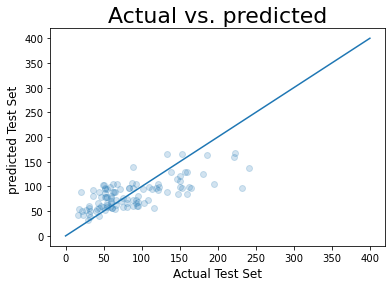

In [22]:
# Actual Test Set(x) vs. predicted Test Set(y)
y_test_pred = lr.predict(X_test)#cross valid do train only 

plt.scatter(y_test, y_test_pred, alpha=0.2)
plt.title("Actual vs. predicted", size=22)
plt.xlabel('Actual Test Set', size=12)
plt.ylabel('predicted Test Set ', size=12)
plt.plot([0, 400], [0, 400])
plt.show()

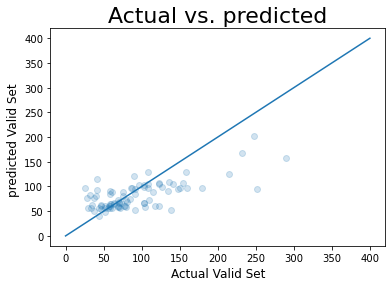

In [44]:
# Actual validation Set(x) vs. predicted validation Set(y)
y_val_pred = lr.predict(X_val)#cross valid do train only 

plt.scatter(y_val, y_val_pred, alpha=0.2)
plt.title("Actual vs. predicted", size=22)
plt.xlabel('Actual Valid Set', size=12)
plt.ylabel('predicted Valid Set ', size=12)
plt.plot([0, 400], [0, 400])
plt.show()

# Polynomial Regression

In [25]:
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly= poly.transform(X_test)
X_val_poly= poly.transform(X_val)

Plr = LinearRegression()
Plr.fit(X_train_poly, y_train)

LinearRegression()

In [26]:
print(Plr.score(X_train_poly, y_train))

0.5217738339915954


In [45]:
print(Plr.score(X_test_poly, y_test))

-4.331800643034774e+23


In [28]:
print(Plr.score(X_val_poly, y_val))

-4.246730327053029e+23


# Lasso

Lasso Model:


C:\Users\banon\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7922.327320450597, tolerance: 32.58300488721804
  model = cd_fast.enet_coordinate_descent(
C:\Users\banon\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8961.194290489657, tolerance: 37.965757894736846
  model = cd_fast.enet_coordinate_descent(
C:\Users\banon\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6578.040509595594, tolerance: 36.360833458646624
  model = cd_fast.enet_coordinate_descent(
C:\Users\banon\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

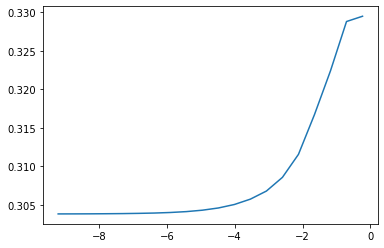

In [29]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
print("Lasso Model:")
params = {
    "alpha": np.logspace(-4, -.1, 20)
}

grid_est = GridSearchCV(Lasso(), param_grid=params, cv=kfold, 
                        return_train_score=False)
grid_est.fit(X_train, y_train)
df_L = pd.DataFrame(grid_est.cv_results_)
df_L["alpha"] = df_L.params.apply(lambda val: val["alpha"])
plt.plot(np.log(df_L.alpha), df_L.mean_test_score);

In [30]:
grid_est.best_estimator_

Lasso(alpha=0.7943282347242815)

In [31]:
params['alpha']

array([1.00000000e-04, 1.60421716e-04, 2.57351270e-04, 4.12847324e-04,
       6.62296762e-04, 1.06246783e-03, 1.70442913e-03, 2.73427446e-03,
       4.38637001e-03, 7.03669004e-03, 1.12883789e-02, 1.81090112e-02,
       2.90507865e-02, 4.66037703e-02, 7.47625680e-02, 1.19935395e-01,
       1.92402418e-01, 3.08655261e-01, 4.95150067e-01, 7.94328235e-01])

# Ridge

Ridge Model:


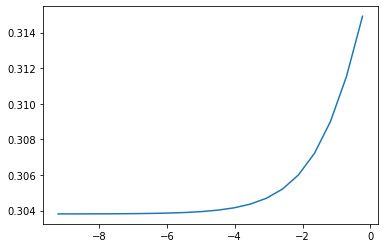

In [32]:
print("Ridge Model:")
params = {
    "alpha": np.logspace(-4, -.1, 20)
}

grid_est_R = GridSearchCV(Ridge(), param_grid=params, cv=kfold, 
                        return_train_score=False)
grid_est_R.fit(X_train, y_train)
df_R = pd.DataFrame(grid_est_R.cv_results_)
df_R["alpha"] = df_R.params.apply(lambda val: val["alpha"])
plt.plot(np.log(df_R.alpha), df_R.mean_test_score);

In [33]:
y_pred = grid_est.predict(X_test)
print("Lasso Regression:", r2_score(y_test, y_pred))

y_pred = grid_est_R.predict(X_test)
print("Ridge Regression:", r2_score(y_test, y_pred))

Lasso Regression: 0.4076141209702978
Ridge Regression: 0.48048235305116704


In [46]:
y_pred = grid_est.predict(X_val)
print("Lasso Regression:", r2_score(y_val, y_pred))

y_pred = grid_est_R.predict(X_val)
print("Ridge Regression:", r2_score(y_val, y_pred))

Lasso Regression: 0.34445666683258913
Ridge Regression: 0.42276682688605016


# LinearRegression best result

In [34]:
indp = new_Airbnb.drop(['price','number of reviews'], axis = 1)
dep = new_Airbnb['price']


indp_train, indp_test, dep_train, dep_test = train_test_split(indp, dep, test_size = 0.2, random_state = 42)

In [35]:
indp.shape

(522, 10)

In [36]:
dep.shape

(522,)

In [37]:
train_score = lr.score(indp_train, dep_train)
train_score

0.41790457963954764

In [38]:
test_score = lr.score(indp_test, dep_test)
test_score

0.4835631210546264

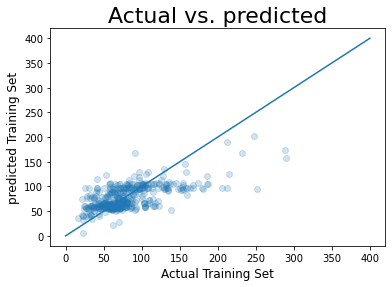

In [41]:
# Actual Training Set(x) vs. predicted Training Set(y)
dep_train_pred = lr.predict(indp_train)

plt.scatter(dep_train, dep_train_pred, alpha=0.2)#cross valid do train only 
plt.title("Actual vs. predicted", size=22)
plt.xlabel('Actual Training Set', size=12)
plt.ylabel('predicted Training Set', size=12)
plt.plot([0, 400], [0, 400])
plt.show()

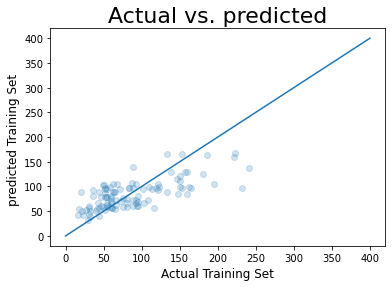

In [42]:
# Actual Test Set(x) vs. predicted Test Set(y)
dep_test_pred = lr.predict(indp_test)#cross valid do train only 

plt.scatter(dep_test, dep_test_pred, alpha=0.2)
plt.title("Actual vs. predicted", size=22)
plt.xlabel('Actual Training Set', size=12)
plt.ylabel('predicted Training Set ', size=12)
plt.plot([0, 400], [0, 400])
plt.show()